# Calculating calibration densities and plotting models
- This workbook shows how we calculate densities for calibration data, plot models and calculate the cali lines

In [1]:
# Import useful python packages
import pandas as pd
import os
import DiadFit as pf
pf.__version__

'0.0.77'

## Plot of density vs fermi splitting

In [2]:
cornellpath=os.getcwd()+'/'+"CMASS_cali_data.xlsx"
cornellcell=pd.read_excel(cornellpath,sheet_name="April_Used2FitEG_Eqs")
apraugdat=pd.read_excel(cornellpath,sheet_name="APR 2021 +AUG21")
display(cornellcell.head())

c:\Users\charl\anaconda3\envs\DiadFit_dev\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Date,time,Raw file name,Sample,v- position (cm-1),v+ position (cm-1),corr v-,corr v+,∆CO2 (cm-1),Ne corrected ∆CO2 (cm-1),...,∆Ne-m (cm-1),∆Ne-r (cm-1),1116 r (cm-1),1446.5 r (cm-1),m,b,laser power,int x acc,approx max counts,Unnamed: 28
0,2021-04-20,14:56:32,FDCA01X1,FDCA01,1279.658597,1384.534514,1280.266389,1385.209445,104.875917,104.943056,...,330.266206,330.477635,1115.991927,1446.469562,1.000640,-0.211417,54 mW,10s x 3,50000,NaN
1,2021-04-20,15:00:18,FDCA01X2,FDCA01,1279.662216,1384.533940,1280.273228,1385.208244,104.871724,104.935016,...,330.278306,330.477635,1115.991927,1446.469562,1.000604,-0.161288,54 mW,10s x 3,50000,NaN
2,2021-04-20,15:04:15,FDCA01X3,FDCA01,1279.656182,1384.534258,1280.271344,1385.214356,104.878076,104.943013,...,330.273142,330.477635,1115.991927,1446.469562,1.000619,-0.177154,54 mW,10s x 3,50000,NaN
3,2021-04-20,15:15:56,FDCA02X1,FDCA02,1279.748089,1384.568105,1280.364694,1385.246217,104.820016,104.881523,...,330.283828,330.477635,1115.991927,1446.469562,1.000587,-0.134338,54 mW,10s x 3,50000,NaN
4,2021-04-20,15:22:06,FDCA02X2,FDCA02,1279.748730,1384.569705,1280.361785,1385.246675,104.820975,104.884890,...,330.276249,330.477635,1115.991927,1446.469562,1.000610,-0.167272,54 mW,10s x 3,50000,NaN


## Fit the calibration lines 
- Separate sets by temperature

In [3]:
T37C=cornellcell[cornellcell['T (ID)']==37]
T37C=apraugdat[apraugdat['T (ID)']==37]

Split_col='Ne corrected ∆CO2  (cm-1)'
CO2_dens_col='Density from EOS  (g/ml)'
split_error=0.01
CO2_dens_error=0.01


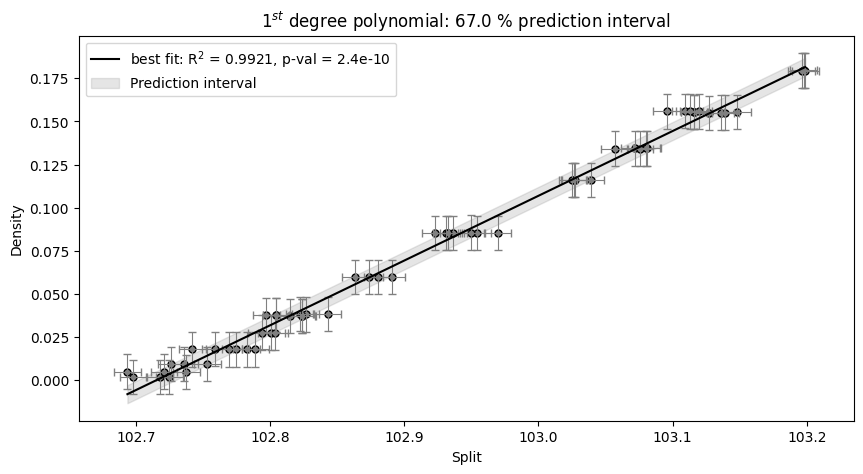

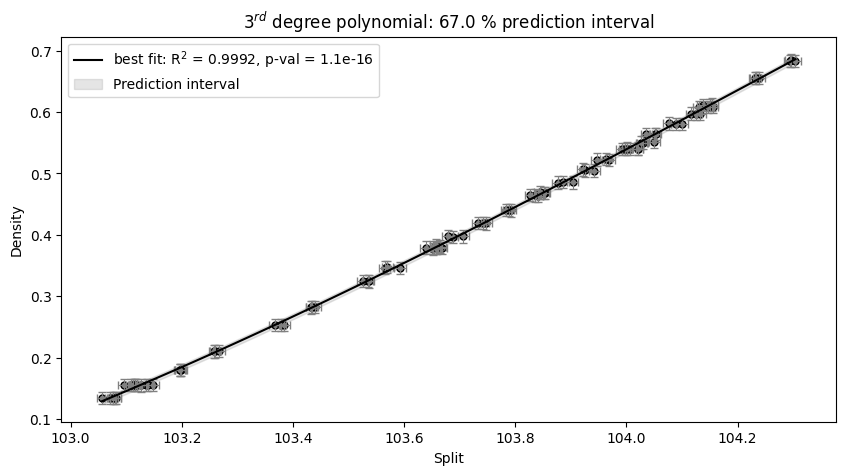

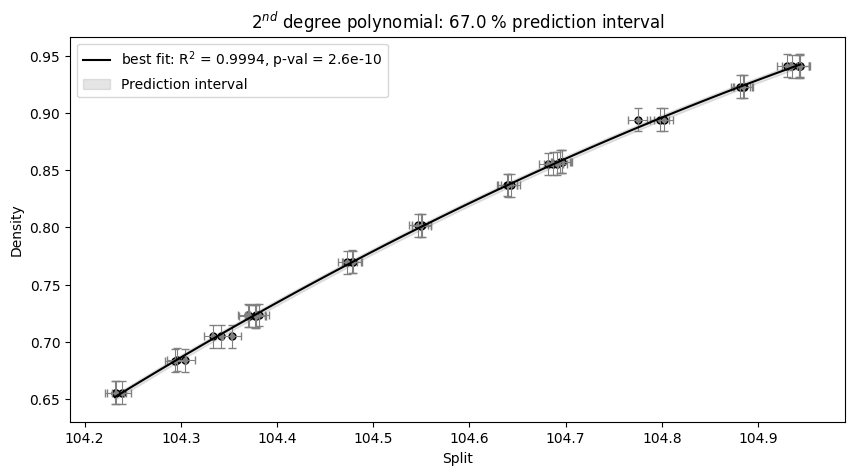

In [4]:
CI=0.67
df=T37C
eq_division='cmass'

pf.plot_and_save_CO2cali_pickle(cali_data=df, Split_col=Split_col, CO2_dens_col=CO2_dens_col, split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='Low',N_poly=1, CI=CI, std_error=True,save_fig=True,eq_division=eq_division)
pf.plot_and_save_CO2cali_pickle(cali_data=df, Split_col=Split_col, CO2_dens_col=CO2_dens_col, split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='Medium',N_poly=3, CI=CI, std_error=True,save_fig=True,eq_division=eq_division)
pf.plot_and_save_CO2cali_pickle(cali_data=df, Split_col=Split_col, CO2_dens_col=CO2_dens_col, split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='High',N_poly=2, CI=CI, std_error=True,save_fig=True,eq_division=eq_division)

import os
if os.path.exists('Lowrho_polyfit_data_EG.pkl'):
    os.remove('Lowrho_polyfit_data_EG.pkl')
if os.path.exists('Mediumrho_polyfit_data_EG.pkl'):
    os.remove('Mediumrho_polyfit_data_EG.pkl')
if os.path.exists('Highrho_polyfit_data_EG.pkl'):
    os.remove('Highrho_polyfit_data_EG.pkl')

os.rename('Lowrho_polyfit_data.pkl', 'Lowrho_polyfit_data_EG.pkl')
os.rename('Mediumrho_polyfit_data.pkl', 'Mediumrho_polyfit_data_EG.pkl')
os.rename('Highrho_polyfit_data.pkl', 'Highrho_polyfit_data_EG.pkl')

In [5]:
import pickle

pickle_file_path=r"C:\Users\charl\Documents\Python dev\DiadFit\docs\Cornell_Densimeter_fitting\CMASS\Lowrho_polyfit_data_EG.pkl"
with open(pickle_file_path, 'rb') as file:
    loweq = pickle.load(file)['model']

pickle_file_path=r"C:\Users\charl\Documents\Python dev\DiadFit\docs\Cornell_Densimeter_fitting\CMASS\Mediumrho_polyfit_data_EG.pkl"
with open(pickle_file_path, 'rb') as file:
    medeq = pickle.load(file)['model']

pickle_file_path=r"C:\Users\charl\Documents\Python dev\DiadFit\docs\Cornell_Densimeter_fitting\CMASS\Highrho_polyfit_data_EG.pkl"
with open(pickle_file_path, 'rb') as file:
    hieq = pickle.load(file)['model']

print(round(loweq(102.72),2))
print(round(loweq(103.25),2))
print(round(medeq(103.06),2))
print(round(medeq(104.33),2))
print(round(hieq(104.23),2))
print(round(hieq(104.95),2))

0.0
0.2
0.13
0.7
0.65
0.94
